In [18]:
import yfinance as yf
from datetime import datetime
import numpy as np


vti = yf.Ticker("VTI")
vti.info

{'phone': '800-523-1036',
 'longBusinessSummary': 'The fund employs an indexing investment approach designed to track the performance of the index, which represents approximately 100% of the investable U.S. stock market and includes large-, mid-, small-, and micro-cap stocks. It invests by sampling the index, meaning that it holds a broadly diversified collection of securities that, in the aggregate, approximates the full index in terms of key characteristics.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 283.91,
 'open': 283.97,
 'dayLow': 283.97,
 'dayHigh': 286.1399,
 'regularMarketPreviousClose': 283.91,
 'regularMarketOpen': 283.97,
 'regularMarketDayLow': 283.97,
 'regularMarketDayHigh': 286.1399,
 'trailingPE': 26.90386,
 'volume': 913972,
 'regularMarketVolume': 913972,
 'averageVolume': 2929001,
 'averageVolume10days': 3698970,
 'averageDailyVolume10Day': 3698970,
 'bid': 285.96,
 'ask': 285.98,
 'bidSize': 900,
 'askSize': 900,
 'yield': 0.013200001,
 'totalAssets': 

In [13]:
end_date = datetime.now().strftime('%Y-%m-%d')
h = vti.history(period='max', end=end_date, interval='1d')
h

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1999-03-10 00:00:00-05:00,43.470417,43.496988,42.752995,43.417274,5232000,0.0,0.0,0.0
1999-03-11 00:00:00-05:00,43.736133,43.988559,42.779571,43.629848,9688600,0.0,0.0,0.0
1999-03-12 00:00:00-05:00,43.470433,43.497004,42.221588,42.567013,8743600,0.0,0.0,0.0
1999-03-15 00:00:00-05:00,42.885857,43.842418,42.434147,43.789276,6369000,0.0,0.0,0.0
1999-03-16 00:00:00-05:00,43.975261,44.347257,43.496980,44.161259,4905800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-10-04 00:00:00-04:00,487.450012,487.880005,482.390015,487.320007,30686600,0.0,0.0,0.0
2024-10-07 00:00:00-04:00,485.390015,486.570007,480.869995,482.100006,24975100,0.0,0.0,0.0
2024-10-08 00:00:00-04:00,484.660004,489.989990,483.850006,489.299988,28272000,0.0,0.0,0.0


In [14]:

r = h.rolling(window=30).mean().Close
d = h.Close - r
idxsell = d.idxmax()
print(f"Up {100.0 * (h.loc[idxsell].Close - r[idxsell]) / h.loc[idxsell].Close:.2f}% or {d[idxsell]:.2f}$ on {idxsell}.")

idxbuy = d.idxmin()
print(f"Down {- 100.0 * (h.loc[idxbuy].Close - r[idxbuy]) / h.loc[idxbuy].Close:.2f}% or {d[idxbuy]:.2f}$ on {idxbuy}.")


Up 10.77% or 33.20$ on 2023-02-02 00:00:00-05:00.
Down 28.00% or -46.06$ on 2020-03-16 00:00:00-04:00.


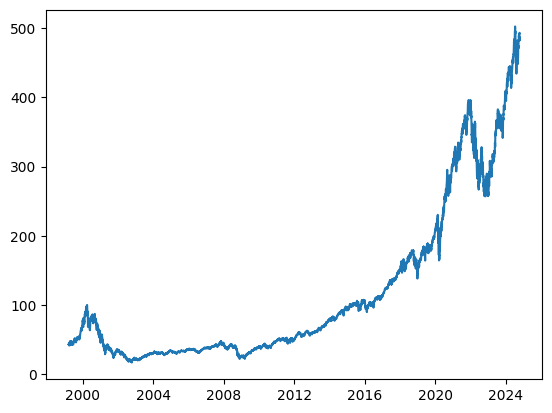

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(h.index, h.Close)
plt.show()


In [16]:
for timestamp in h.head(3).index:
    print(timestamp.strftime('%Y-%m-%d'))


h.index = h.index.tz_convert(None)
h[h.index > np.datetime64('2024-01-01')]

1999-03-10
1999-03-11
1999-03-12


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-01-02 05:00:00,404.093035,404.341959,398.517135,400.857025,58026900,0.0,0.0,0.0
2024-01-03 05:00:00,398.208475,399.273877,396.177278,396.615356,47002800,0.0,0.0,0.0
2024-01-04 05:00:00,394.733503,397.869938,394.355134,394.574188,39432800,0.0,0.0,0.0
2024-01-05 05:00:00,394.743448,397.840046,393.638211,395.042145,44867900,0.0,0.0,0.0
2024-01-08 05:00:00,396.276817,403.495608,396.127468,403.206879,42473800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-10-04 04:00:00,487.450012,487.880005,482.390015,487.320007,30686600,0.0,0.0,0.0
2024-10-07 04:00:00,485.390015,486.570007,480.869995,482.100006,24975100,0.0,0.0,0.0
2024-10-08 04:00:00,484.660004,489.989990,483.850006,489.299988,28272000,0.0,0.0,0.0


/tmp/ipykernel_12921/666940856.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = h.iloc[-1:].Close[0]


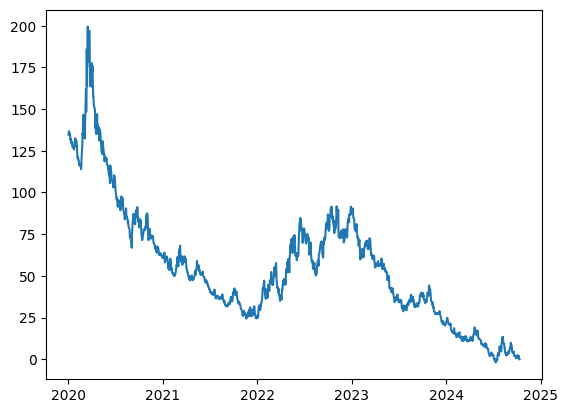

In [17]:


def with_returns(since: np.datetime64 = None):
    end_value = h.iloc[-1:].Close[0]
    ret = 100.0 * (end_value - h.Close) / h.Close
    if since:
        return h[h.index >= since].copy().join(ret.rename('Returns'))
    else:
        return h.copy().join(ret.rename('Returns'))
    
x = with_returns(np.datetime64('2020-01-01'))
plt.plot(x.index, x.Returns)
plt.show()
